<a href="https://colab.research.google.com/github/tensorbytes0202/Deep-learning/blob/main/churn_prediction_using_neural_network_adi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [7]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df = df.astype(int)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0,2,1,1,179093,0,0,1
1561,632,42,4,119624,2,1,1,195978,1,0,1
1670,559,24,3,114739,1,1,0,85891,0,1,1
6087,561,27,9,135637,1,1,0,153080,0,0,0
6669,517,56,9,142147,1,0,0,39488,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712,1,1,1,69381,0,0,1
5191,682,58,1,0,1,1,1,706,0,0,0
5390,735,38,1,0,3,0,0,92220,0,0,0
860,667,43,8,190227,1,1,0,97508,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [23]:
X_test_scaled

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]])

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5823 - loss: 0.6690 - val_accuracy: 0.7987 - val_loss: 0.5071
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4993 - val_accuracy: 0.8012 - val_loss: 0.4621
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4508 - val_accuracy: 0.8106 - val_loss: 0.4388
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4424 - val_accuracy: 0.8169 - val_loss: 0.4194
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.4079 - val_accuracy: 0.8313 - val_loss: 0.3983
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3834 - val_accuracy: 0.8406 - val_loss: 0.3836
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3736 - val_accuracy: 0.8356 - val_loss: 0.3730
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3480 - val_accu

In [32]:
model.layers[0].get_weights()

[array([[ 0.10934834, -0.02567186, -0.00328143,  0.0913652 , -0.09525895,
         -0.3923324 ,  0.08919502, -0.02190458, -0.6164689 , -0.5694774 ,
         -0.05680851],
        [ 0.30094242,  0.16326866, -1.1465949 , -1.0276357 ,  0.06688149,
         -0.54787064,  0.14479539,  0.38275954, -0.08377131,  0.34787792,
         -0.3447641 ],
        [ 0.12932204, -0.22221507, -0.10172398,  0.10460983, -0.05334944,
          0.27108458,  0.19201286, -0.01786743, -0.41456094, -0.02451456,
         -0.53330374],
        [-0.96577084,  0.6880532 , -0.35413083,  0.03155347, -0.14175971,
         -0.6393597 , -0.49606118, -0.3320906 , -0.35005695, -0.36931765,
         -0.7221701 ],
        [ 0.04129136,  0.13791351,  0.19134593,  0.12004012,  1.1541275 ,
         -0.58004206, -0.67367816,  0.00850291, -0.00957032,  0.79139715,
         -0.5290736 ],
        [-0.11498916,  0.06859978, -0.1356775 , -0.00728049, -0.13491897,
         -0.26977596, -0.35630447, -0.03193557, -0.28233284, -0.507864 

In [33]:
model.layers[1].get_weights()

[array([[ 0.53600574, -0.63264936,  0.24651895,  0.04598266,  0.31513518,
          0.26456523, -0.16256209, -0.2928126 , -0.36800376, -0.742795  ,
         -0.466443  ],
        [ 0.25018966, -0.23728852, -0.6045438 ,  0.43310532, -0.00329923,
          0.13212988,  0.13246462, -0.23594719,  0.53202546,  0.71806675,
          0.11837263],
        [-0.5967363 , -0.11988531,  0.37313852,  0.06649692,  0.3244881 ,
          0.81524533, -1.1775695 , -0.119622  ,  0.23668504, -0.06107994,
          0.68232805],
        [-0.5229001 , -0.15287395,  0.10422089,  0.04532185, -0.02826915,
          0.6610447 , -0.653145  ,  0.03900997, -0.35906884,  0.23507   ,
          0.54053307],
        [ 0.74961776, -0.37595153,  0.154243  ,  0.75392556, -0.54403865,
         -0.20534953, -0.35363352,  0.715486  ,  0.6612684 , -0.8001532 ,
         -0.27522886],
        [ 0.61914617,  0.21378975,  0.41957757, -0.44939497, -0.84262705,
          0.18280873, -0.01534644,  0.18570039,  0.38377896,  0.2694493

In [34]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [35]:
y_pred = np.where(y_pred>0.5,1,0)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.8605

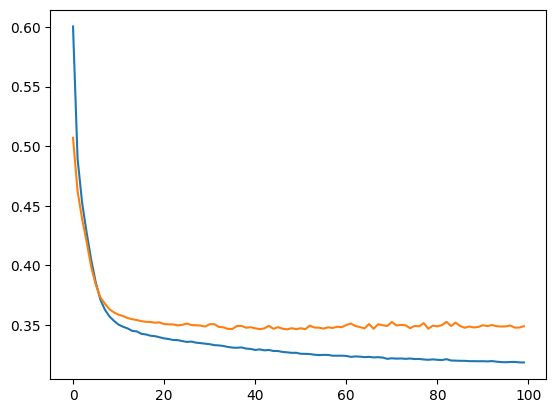

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


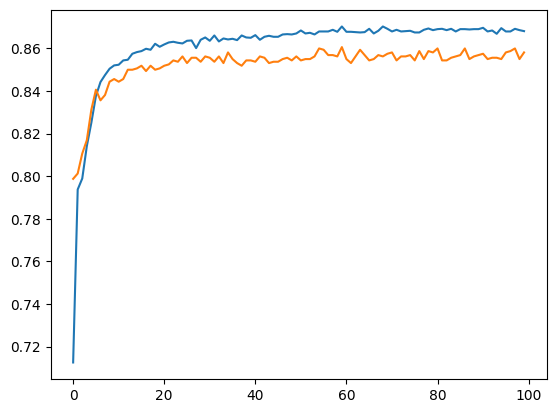

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])